In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import pandas as pd
import pprint
from sklearn.neighbors import NearestNeighbors

In [2]:
dataFrame = pd.read_csv('M.csv');
#print(dataFrame.columns.values)
parties = dataFrame['party']
partyNames = list(parties.values)
#print(partyNames)

In [3]:
print(set(parties))
party = {}
indicator = 0;
for key in set(parties):
    party[key] = indicator;
    indicator += 1;
print(party)
print(list(set(parties)))
partyNames = list(set(parties))

{'skp', 'ps', 'kok', 'pir', 'kesk', 'vihr', 'sdp', 'rkp', 'kd', 'vas'}
{'skp': 0, 'ps': 1, 'kok': 2, 'pir': 3, 'kesk': 4, 'vihr': 5, 'sdp': 6, 'rkp': 7, 'kd': 8, 'vas': 9}
['skp', 'ps', 'kok', 'pir', 'kesk', 'vihr', 'sdp', 'rkp', 'kd', 'vas']


In [4]:
print(len(dataFrame))
dataArr = np.zeros((len(dataFrame),49));
partyMapped = []
for i in range(0,len(dataFrame)):
    dataArr[i][:] = dataFrame.loc[i][4:].values
    partyMapped.append(party[parties[i]])
print(set(partyMapped))
print(dataArr.shape)
assert(dataArr.shape == (len(dataFrame),49))

795
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(795, 49)


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.lines import Line2D

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


pca = PCA(n_components=2, svd_solver='arpack')
pca_data = pca.fit_transform(dataArr)
ax = plt.subplot(111)
ax.scatter(pca_data[:,0],pca_data[:,1],c= partyMapped,label=partyNames, cmap=plt.cm.tab10,alpha=0.7,s=40)

#Creating legends
handles = []
cmap = plt.cm.get_cmap('tab10')
for i in range(0,10):
    color = cmap(i)
    handles.append(Line2D([0], [0], marker='o', color='w', label=partyNames[i],
                          markerfacecolor=color, markersize=10))
plt.title('PCA data embedding')
#ax.legend()
#plt.colorbar()
plt.xlabel('Principle Axis 1')
plt.ylabel('Principle Axis 2')
plt.xlim(xmax=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(handles=handles)
#plt.show()
plt.savefig('q2-1.png')
plt.clf()





In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


from sklearn import manifold
n_neighbors = 10
n_components = 2

mds = manifold.MDS(n_components, max_iter=300,metric=False)
mdsData = mds.fit_transform(dataArr)
ax = plt.subplot(111)
y = np.linspace(0,1000,1000);
ax.scatter(mdsData[:,0],mdsData[:,1],c= partyMapped,label=partyNames, cmap=plt.cm.tab10,alpha=0.5,s=40)

#Creating legends
handles = []
cmap = plt.cm.get_cmap('tab10')
for i in range(0,10):
    color = cmap(i)
    handles.append(Line2D([0], [0], marker='o', color='w', label=partyNames[i],
                          markerfacecolor=color, markersize=10))
plt.title('non metric MDS data embedding')

plt.xlabel('Embed Axis 1')
plt.ylabel('Embed Axis 2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(xmax=0.8)
plt.legend(handles=handles)
#plt.show()
plt.savefig('q2-2.png')
plt.clf()

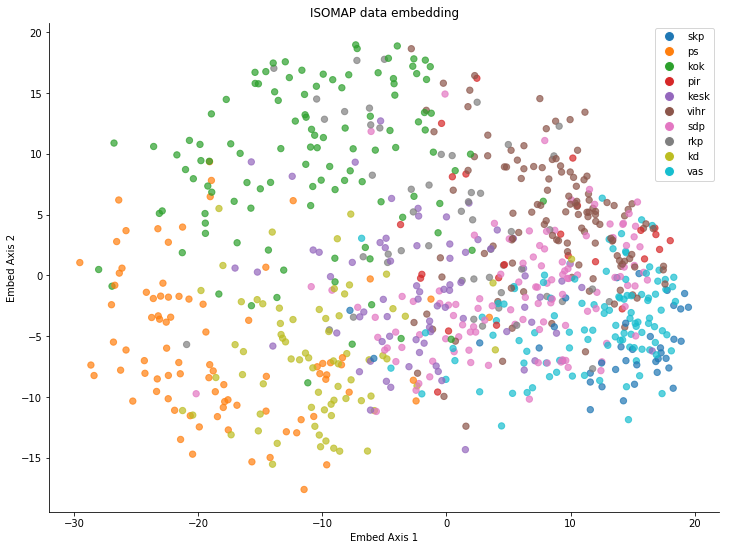

In [9]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


n_neighbors = 10
isomap = manifold.Isomap(n_neighbors, n_components)
isomapData = isomap.fit_transform(dataArr)
ax = plt.subplot(111)
y = np.linspace(0,1000,1000);
ax.scatter(isomapData[:,0],isomapData[:,1],c= partyMapped,label=partyNames, cmap=plt.cm.tab10,alpha=0.7,s=40)

#Creating legends
handles = []
cmap = plt.cm.get_cmap('tab10')
for i in range(0,10):
    color = cmap(i)
    handles.append(Line2D([0], [0], marker='o', color='w', label=partyNames[i],
                          markerfacecolor=color, markersize=10))
plt.title('ISOMAP data embedding')

plt.xlabel('Embed Axis 1')
plt.ylabel('Embed Axis 2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(handles=handles)
plt.show()
#plt.clf()

In [33]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))
ax = plt.subplot(111)
selected = False;
for i in range(len(isomapData)):
    if partyMapped[i] == 4:
        if selected == False:
            ax.scatter(isomapData[i,0],isomapData[i,1],color=colors[partyMapped[i]], alpha=1,s = 130,edgecolors='k')
            selected = True;
        else:
            ax.scatter(isomapData[i,0],isomapData[i,1],color=colors[partyMapped[i]], alpha=0.7,s = 100)
    else:
        ax.scatter(isomapData[i,0],isomapData[i,1],color=colors[partyMapped[i]], alpha=0.5,s = 1)
plt.title('ISOMAP embedding: Fisheye view for KESK party')
plt.xlabel('Embed Axis 1')
plt.ylabel('Embed Axis 2')
plt.savefig('q3.png')
plt.clf()

### Difference between Helsinki and Espoo Datapoints
The quick look on the MDS plot shows that there is huge difference between the Espoo and Helsinki data. There are no clusters in the Helsinki data whereas there are some clusters present in Espoo data. The difference could be real, or it could be some noise added to the data. As MDS takes euclidian distance into account directly, the shape of the graph could be effected by the addition of noise. We therefore have to observe the other two plots created; namely PCA and ISOMAP.

PCA is one of the projection pursuit methods, which finds the axis with maximum variance and hence addtion of noise does not affect directly to the projection. In the PCA plot we can observe that the clusters are the same as that of Espoo dataset.

Furthermore, to support our observation we look into the ISOMAP plot. This embedding technique finds the nearest neighbors of a point, and constructs a tree. It than finds the distance between the points using that tree and feed it to MDS stress function. In ISOMAP plot of the Helsinki data it could be seen that the clusters are preserved in the data.

Looking at all the three plots we can conclude that the difference between data is not real but noise artifact. The noise changed the plot for the MDS; which is directly taking into account the euclidean distance; but it does not affect the PCA or the ISOMAP plot which project the data using different technique. Hence, it could be concluded that the response of candidates for Helsinki and Esppo are almost the same.

### PCA
PCA is one of the projection pursuit methods, which finds the axis with maximum variance. The data matrix is decomposed into SVD and the axis with highest variance is selected to represent the data. In this example of candidate elections dataset we choose 2 principle axis with the highest vairance. The plot of PCA in figure (figure number) shows that the clusters of data are still preserved in the embedded dimension. PCA embedded data keeps the distance between close points close and distant points distant. The behavior could be seen in the figure as well. The fact is also reinforced by the high precision and recall rate of the embedding technique found in Exercise 1

### ISOMAP
ISOMAP embedding technique is a variation of traditional MDS embedding. We first create a graph of the nearest neighbor of data points and than find the distance between the points using that graph. Those geodestic distances are than fed into linear MDS. The technique represents small distances much better than the classical MDS. In the ISOMAP plot created it could be observed that the clusters are maintained as in the original data.

### Non metric MDS
MDS uses euclidean distance or in non-metric case a monotonic transformation of embedded space euclidean distance to compare with original space. It than uses regression to find the local minima. MDS is tries to preserve the large distances at the expense of small ones, hence, it can
“collapse” some small distances on the expense of preserving large distances. However, as raw euclidean distances are used, small noise in the data collection or noise could change the embedding. This effect could be seen in the non-metric MDS plot (figure number).